# Analyzing h5 file

## Import libraries and h5 file

In [ ]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

filename = 'SEVIR_IR069_STORMEVENTS_2019_0701_1231.h5'  #"SEVIR_VIS_STORMEVENTS_2019_0101_0131.h5"
hf = h5py.File(filename, 'r')

## Check Keys in h5 file

In [2]:
hf.keys()

<KeysViewHDF5 ['id', 'ir069']>

## Checking the datatype of the keys in h5 file

In [3]:
type(hf['id']), hf['id'][0], type(hf['ir069']), hf['ir069']

(h5py._hl.dataset.Dataset,
 b'S839027',
 h5py._hl.dataset.Dataset,
 <HDF5 dataset "ir069": shape (692, 192, 192, 49), type "<i2">)

## Plot images for 1 event at 25 min time intervals

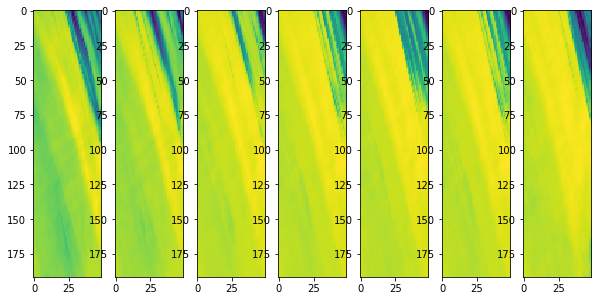

In [8]:
fig,axs=plt.subplots(1,7,figsize=(10,10))
axs[0].imshow(hf['ir069'][100][:][:][10])
axs[1].imshow(hf['ir069'][100][:][:][15])
axs[2].imshow(hf['ir069'][100][:][:][20])
axs[3].imshow(hf['ir069'][100][:][:][25])
axs[4].imshow(hf['ir069'][100][:][:][30])
axs[5].imshow(hf['ir069'][100][:][:][25])
axs[6].imshow(hf['ir069'][100][:][:][40])
plt.show()

## Store the images in dataframe where each row is an image of an event at a particular time stamp

In [5]:

df = pd.DataFrame()

for num,i in enumerate(hf['ir069'][:5,:,:,:]):
    #print(i.shape, (hf['id'][num]))
    for j in range(49):
        #print(i[:,:,j].shape)
        df = df.append(pd.Series(i[:,:,j].flatten()), ignore_index=True)
        df.at[num, 'event_time'] = str(hf['id'][num]) + '_' + str(j)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,36855,36856,36857,36858,36859,36860,36861,36862,36863,event_time
0,-3257.0,-3152.0,-3115.0,-3034.0,-2915.0,-2997.0,-3258.0,-3569.0,-3651.0,-3687.0,...,-2273.0,-2256.0,-2237.0,-2222.0,-2221.0,-2235.0,-2246.0,-2243.0,-2236.0,b'S839027'_48
1,-3244.0,-3161.0,-3096.0,-3141.0,-3188.0,-3236.0,-3213.0,-3142.0,-3144.0,-3182.0,...,-2290.0,-2283.0,-2267.0,-2244.0,-2225.0,-2222.0,-2235.0,-2247.0,-2249.0,b'S851839'_48
2,-2991.0,-2974.0,-2980.0,-3007.0,-3078.0,-3180.0,-3253.0,-3257.0,-3206.0,-3118.0,...,-2341.0,-2325.0,-2307.0,-2282.0,-2257.0,-2249.0,-2245.0,-2241.0,-2242.0,b'S853914'_48
3,-2806.0,-2783.0,-2827.0,-2952.0,-3068.0,-3152.0,-3239.0,-3316.0,-3226.0,-3161.0,...,-2368.0,-2368.0,-2359.0,-2333.0,-2299.0,-2282.0,-2279.0,-2273.0,-2259.0,b'S858016'_48
4,-2710.0,-2690.0,-2696.0,-2764.0,-2893.0,-3172.0,-3443.0,-3539.0,-3432.0,-3294.0,...,-2376.0,-2383.0,-2379.0,-2367.0,-2351.0,-2331.0,-2322.0,-2308.0,-2287.0,b'S852208'_48
